Importing the Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams

from collections import defaultdict, Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's import the datasets


In [9]:
tweets=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

print('Tweets: ', tweets.shape)
print('Test: ', test.shape)

Tweets:  (7613, 5)
Test:  (3263, 4)


In [11]:
tweets.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Let's find out the proportion of tweets for disaster and non-disaster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


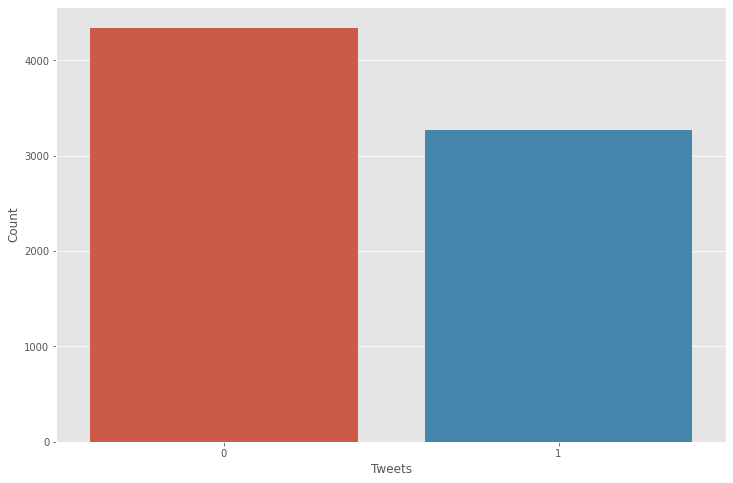

In [13]:
dis_nondis=tweets['target'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(dis_nondis.index, dis_nondis.values)
plt.ylabel('Count')
plt.xlabel('Tweets')
plt.show()

It seems like more than half of the tweets are non-disasters. To be specific, let's find out the exact numer for each one.

In [19]:
dis=tweets[tweets['target']==1]
nondis=tweets[tweets['target']==0]
print('Disaster: ', dis.shape)
print()
print('Non-Disaster: ', nondis.shape)

Disaster:  (3271, 5)

Non-Disaster:  (4342, 5)


Here we can see the exact number of tweets that were really about a disaster. It means the number of tweets is not equal in the dataset which may affect our prediction later in this project. We can also look for the number of words and characters for each category. Let's find the number of word first.

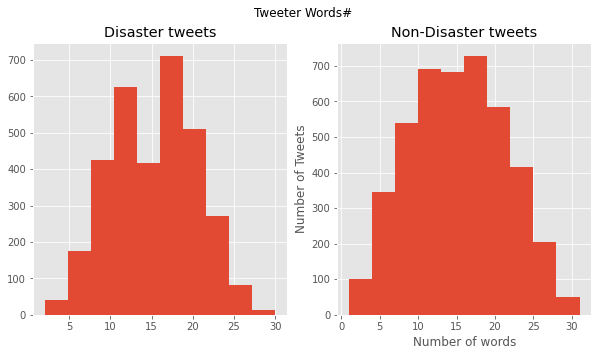

In [28]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10, 5))
words_tweet=tweets[tweets['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(words_tweet)
ax1.set_title('Disaster tweets')
plt.ylabel('Number of Tweets')
words_tweet=tweets[tweets['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(words_tweet)
ax2.set_title('Non-Disaster tweets')
plt.ylabel('Number of Tweets')
fig.suptitle('Tweeter Words#')
plt.show()
